In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Questions: 
**1). Do people who code as a hobby and work as a developer tend to have higher job satisaction? <br>
2). What are the biggest contributors towards salary? <br>
3). Are students expected salaries resonable for the top 5 most frequent countries in the survey?**

About the data: <br>
This data is taken from a 2017 stackoverflow survey. All the questions asked can be found in the schema dataframe, and the respective answers can be found in the dataframe df.

In [45]:
df = pd.read_csv("survey-results-public.csv")
schema = pd.read_csv("survey-results-schema.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1). Do people who code as a hobby and work as a developer tend to have higher job satisaction?

I would like to know the difference in overall job satisfaction between those that code as a hobby or contribute towards open source, and those who dont. I would like to know this statistic as a percentage value for all ranks of job satisfaction. 

To answer this question I will need to split the data into those that code as a hobby and those that dont. To determine this I need to find the number of unique entries there are in the "Professional" column and see which relate to the above question.

In [46]:
# what type of professionals answered the survey and how many of each categeory are there?
df.Professional.value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

Above the two categories that will be useful are the professional developer (as they are currently working) and "used to be a professional developer".

In [47]:
# from the above I can use the profesional developer and used to be a profesional developer
df_dev = df[(df.Professional == "Professional developer") | (df.Professional == "Used to be a professional developer")]

To understand which questions count as coding as a hobby or open source the schema will need to be refered to

In [48]:
# What does the Program as hobby ask?
list(schema[schema.Column == "ProgramHobby"].Question)[0]

'Do you program as a hobby or contribute to open source projects?'

In [49]:
# unique values and frequency?
df_dev.ProgramHobby.value_counts()

Yes, I program as a hobby                    16799
Yes, both                                    10278
No                                            7726
Yes, I contribute to open source projects     2311
Name: ProgramHobby, dtype: int64

Only those that code as a hobby or contribute towards open source should be included, going forwards the "No" category will be filtered out. 

In [50]:
df_dev.JobSatisfaction.isna().sum()

1433

To answer the above questions the Job Satisfaction column is needed, this column currently has null values in it. Going forwards the null values will be drop, this is becasue imputing the missing values could lead to diluted data and therefore a statistic that doen not accurately measure the true statistic.

In [51]:
df_dev = df_dev.dropna(subset=["JobSatisfaction"])

The below code shows that the null values have been dropped

In [52]:
df_dev.JobSatisfaction.isna().sum()

0

The dataframe will not have to be split into code for hobby and not. To answer the above question both dataframes will have all their individual job satisfaction ratings counted and summed together, the values will then be divided by the length of the dataframe and times by 100 to give the answer as a percentage.

In [53]:
# I will include all but "no"
df_dev_hob = df_dev[df_dev.ProgramHobby != "No"]
# create series of developers who code for fun job statisfaction as a percentage:
dev_hob_job = pd.Series(df_dev_hob.JobSatisfaction.value_counts()/len(df_dev_hob))

# What about the developers that dont code for fun?
df_dev_no = df_dev[(df_dev.ProgramHobby == "No")]
dev_no_job = pd.Series(df_dev_no.JobSatisfaction.value_counts()/len(df_dev_no))

In [54]:
# creating a dataframe for the difference in job satisfaction for hobby and non-hobby
hob_job = dev_hob_job.rename("Hobby")
no_job = dev_no_job.rename("NotHobby")
diff = pd.concat([no_job, hob_job],axis=1)
diff["difference"] = 100*(diff.Hobby - diff.NotHobby)

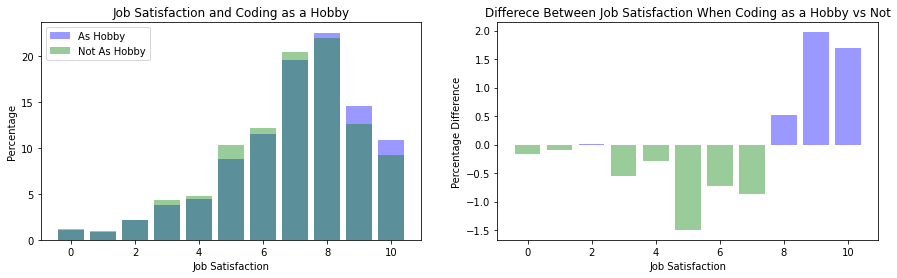

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.bar(dev_hob_job.index, 100*dev_hob_job.values, color = "blue", alpha = 0.4, label="As Hobby")
ax1.bar(dev_no_job.index, 100*dev_no_job.values, color="green", alpha = 0.4, label="Not As Hobby")
ax1.set(xlabel='Job Satisfaction', ylabel='Percentage')
ax1.set_title("Job Satisfaction and Coding as a Hobby");
ax1.legend();

col = np.where(diff.difference < 0, "green", "blue")
ax2.bar(diff.index, diff.difference, color = col, alpha = 0.4, label="As Hobby")
ax2.set(xlabel='Job Satisfaction', ylabel='Percentage Difference')
ax2.set_title("Differece Between Job Satisfaction When Coding as a Hobby vs Not");

In [56]:
print("The mean Job Satisfaction for those that code as a hobby is: {:.2f}, and for those that dont: {:.2f}".format(df_dev_hob.JobSatisfaction.mean(),df_dev_no.JobSatisfaction.mean()))

The mean Job Satisfaction for those that code as a hobby is: 7.04, and for those that dont: 6.86


**Answer:** <br>
People that code for fun have a higher percentage of job satisfactions above a rating of 8. However, this is only by a very small margin (as shown in the right plot) with the largest percentage disagreement in the job satisfaction rating of 9 being just over 1.5%. The mean value of people who code for fun is also slightly larger with a percenatage differenc of 2.6%. <br>

Overall there does seem to be a slightly higher job satisfaction with people who code for fun.

**Improvements** <br>
To improve the results perhaps a more complex method to impute the dropped null values in the job satisfaction column could have been used, i.e. a softmax classifier could be used to predict the missing job satisfactions. This could result in the measured statistic being closer to the actual statistic. 

### 2). What are the biggest contributors towards salary for USA and UK?

To answer this question trends in the data that correlate well with an increase in salary will need to be found. This is easily dont when working with numerical data, however, the majority of data in the dataset are categorical values. To overcome this problem the categorical values will be one hot encoded.

The null values for the target variable "Salary" will all be dropped and not imputed. The nulls will not be imputed to prevent dilution of the dataset.

As the salary is for each country is in its respective currancy the conversion from pounds to dollar will have to be carried out, this will allow for fair comparison.



In [57]:
# drop cells that dont contain a salary:
df2 = df.dropna(subset=["Salary"])
df2.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
14,15,Professional developer,"Yes, I program as a hobby",United Kingdom,No,Employed full-time,Professional degree,Computer engineering or electrical/electronics...,All or almost all the time (I'm full-time remote),"5,000 to 9,999 employees",...,Disagree,Male,High school,White or of European descent,Somewhat agree,Agree,Disagree,Agree,100000.0,NaN
17,18,Professional developer,"Yes, both",United States,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),"1,000 to 4,999 employees",...,Disagree,Male,A master's degree,"Native American, Pacific Islander, or Indigeno...",Disagree,Agree,Disagree,Agree,130000.0,NaN
18,19,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,"10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82500.0,NaN
22,23,Professional developer,No,Israel,No,Employed full-time,Bachelor's degree,Computer engineering or electrical/electronics...,A few days each month,500 to 999 employees,...,Somewhat agree,Male,A bachelor's degree,White or of European descent,Strongly agree,Somewhat agree,Somewhat agree,Agree,100764.0,NaN


In [58]:
list(schema[schema.Column == "Salary"].Question)[0] # salary in different currencies...

'What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?'

In [59]:
# reduce df to United States and United Kingdom, and convert pounds to dollars 1:1.39 (10/07/2021)
def usa_uk_dollar(df):
    '''
    Input the dataframe.
    Output the dataframe with salary in pounds converted to dollars.
    '''
    df = df[(df.Country == "United Kingdom") | (df.Country == "United States")]
    df["Salary"] = df[["Country","Salary"]].apply(lambda x: x[1]*1.39 if x[0] == "United Kingdom" else x[1], axis=1)
    
    return df

df2 = usa_uk_dollar(df2)

<ipython-input-59-cfd2f8183b8f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Salary"] = df[["Country","Salary"]].apply(lambda x: x[1]*1.39 if x[0] == "United Kingdom" else x[1], axis=1)


In [60]:
def remove_all_null_columns(df):
    '''
    Input the dataframe
    Output the dataframe without columns with all missing values
    '''
    cols = list(df.columns)
    df_len = len(df)
    all_null_columns = []
    
    for col in df.columns:
        if df[col].isna().sum() == df_len:
            all_null_columns.append(col)
            
    df = df.drop(labels=all_null_columns, axis=1)
    
    return df

df2 = remove_all_null_columns(df2)

All the missing values in the numerical columns will be replaced with the mean values.
All the missing values in the categorical columns will be replaced with the most common values.

This will allow for the dataset to have more usable samples when aswering the questions above, however, dilution of data should be kept in mind.

In [61]:
def imputer(df):
    '''
    Input df
    Output df with NaN values filled with mean for numeric values and mode for categroical values
    '''
    df_num = df.select_dtypes(include=[int,float])
    df_cat = df.select_dtypes(include=object)

    df_num = df_num.apply(lambda col: col.fillna(col.mean()), axis=0)
    df_cat = df_cat.apply(lambda col: col.fillna(col.mode()[0]), axis=0)
    
    return pd.concat([df_num, df_cat], axis=1)

df2 = imputer(df2)

In [62]:
# convert all catagorical values into dummy variables:
def dummy_variables(df):
    '''
    Input dataframe
    Output the dataframe with all categroical values as individual binary columns
    '''
    
    col_cat = df.select_dtypes(include = object)

    for col in col_cat.columns:
        df = pd.concat([df.drop(labels=col,axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep="_", drop_first=True, dummy_na=False)],axis=1)
        
    return df

df2 = dummy_variables(df2)
df2.shape

(5167, 12099)

Creating dummy variables from the dataframe has resulted in a very large number of features, it would be a very tidius job to manually plot these individual features out and look for correlations or trends. For this reason the correlation with method will be used to give a numeric value of how well the feature correlats to the target value.

Only the top 5 have been selected in this case, however, the code will allow for as many as the reader likes to be looked at.

In [63]:
salary_corr = df2.drop(labels="Salary",axis=1).corrwith(df2.Salary).sort_values(ascending=False)
salary_corr[0:5]

YearsProgram_20 or more years              0.369088
Currency_U.S. dollars ($)                  0.290947
Country_United States                      0.287580
YearsCodedJob_20 or more years             0.275009
CompanyType_Publicly-traded corporation    0.226129
dtype: float64

What do the columns above mean? The schema can be consulted to answer this question:

In [64]:
questions = []
for item in list(salary_corr[0:5].index):
    questions.append(item.split("_")[0])

for count, question in enumerate(questions):
    print(str(count+1) + str(")."), list(schema[schema.Column == question].Question)[0])

1). How long has it been since you first learned how to program?
2). Which currency do you use day-to-day? If you're a globe-trotting digital nomad and the answer is “it's complicated,” please pick the one you're most comfortable estimating in.
3). In which country do you currently live?
4). For how many years have you coded as part of your job?
5). Which of the following best describes the type of company or organization you work for?


The labels for salary_corr will be updated to be more readable for the end user.

In [65]:
# making the answers readable:
correlation_questions_answers = ["Years of Programming > 20", "Currency Paid in: USD", "Country: USA", "Years Coding Professionally > 20", "Company Type: Public"]
top_salary_corr = pd.Series(data=salary_corr[0:5].values, index=correlation_questions_answers)

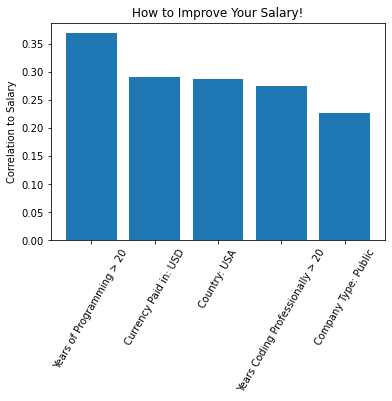

In [66]:
plt.bar(x=top_salary_corr.index, height=top_salary_corr.values)
plt.title("How to Improve Your Salary!")
plt.ylabel("Correlation to Salary")
plt.xticks(rotation=60);

**Results** <br>
The plot above shows that to increase your salary the best options are to have gained more than 20 years of programming experience, to be paid in USD, to live in the USA, and to work in a publically traded company.

In the data their could still be features that are more correlated to the increase of salary, a correlation algorithm looks at the individual feature as a whole and cannot find complex patters in the data. For example if one of the features shows a y=x^2 realtionship then its correlation will be low, but certain areas of that featue will show very large increases in salary.

The effects of imputing the missing values could have induced some dilution in the dataset. 

The answers to the question above make sense given my understanding of salaries and the US market place, so i would be confident taking these findings forwards.

### 3). Are students expected salaries resonable for the top 5 most frequent countries in the survey?

This question will be answered to draw up a statistic of the percentage difference between what students expect to be paid compared to what they are likely to be paid.

To answer this question the country, salary, expected salary, profession, and years having a coding job columns will be needed. The data will first be split to include only those that are from the top 5 most occurring countries in the dataset, this will allow for the larger sampling sets to be used when finding the statistics. 

The below code is used to include only the top 5 countries in the final statisitic, more can be easily found if needed (the code scales well).

In [67]:
# getting the most occuring countries:
def top_countries(df, num_countries = 5):
    '''
    Inputs the dataframe and the number of top occuring countries to reduce the dataframe down to.
    Returns the dataframe with only the top countries by count.
    '''
    not_top_countries = list(df.Country.value_counts().index[num_countries:])
    for countries in not_top_countries:
        df = df[df.Country != countries]
        
    return df

df3 = top_countries(df, num_countries=5)

All of the salaries and expected salaries are need to answer this question. I have decided to drop the missing values rather than imputing them, this will allow for a dataset to more accurately represent the true population.

In [68]:
def create_student_and_dev_df(df):
    
    # only students have expected salaries
    df_student = df.dropna(subset=["ExpectedSalary"])
    
    df_dev = df.dropna(subset=["Salary"])
    # only look at developers with 0-2 years experience
    df_dev = df_dev[(df_dev.YearsCodedJob == "Less than a year") | (df_dev.YearsCodedJob == "1 to 2 years")]
    
    return df_student, df_dev

df3_student, df3_dev = create_student_and_dev_df(df3)

A measure of center needs to be taken for the expected salary and salary to allow for a comparision and percentage difference. The distribution of the data will be needed to decide what statistic to use for centrality.

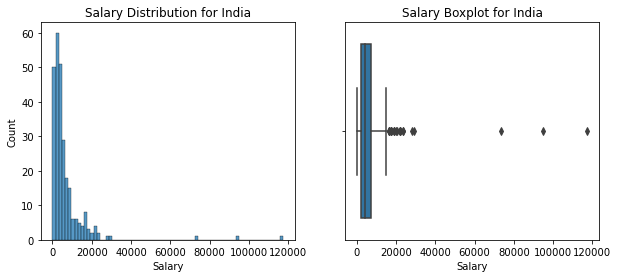

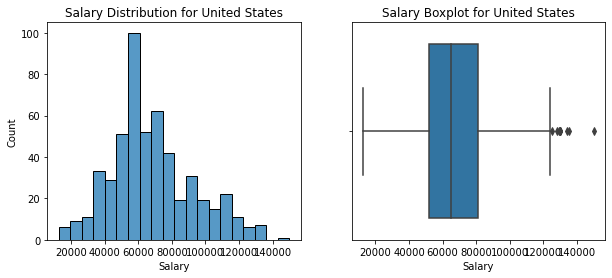

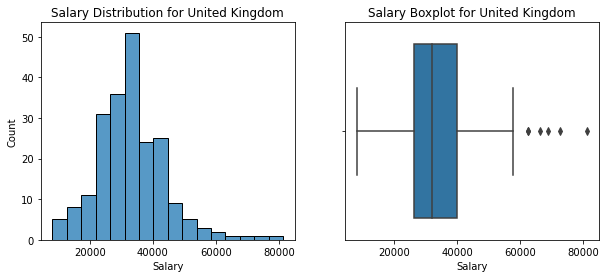

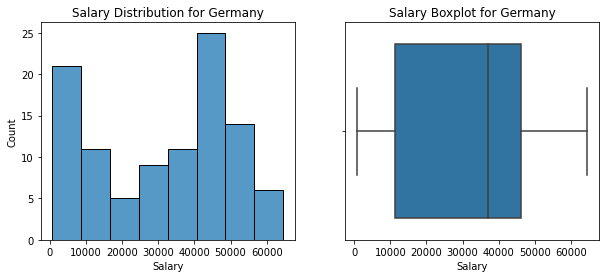

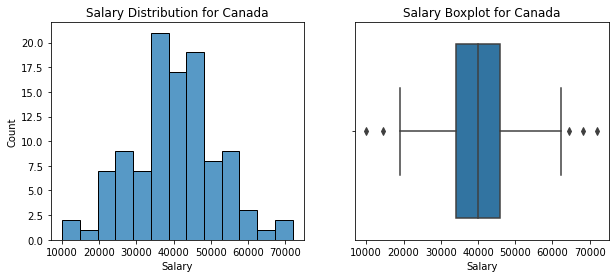

In [69]:
countries = df3_dev.Country.unique()

for country in countries:
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(data=df3_dev[df3_dev.Country == country], x="Salary", ax=ax[0]).set_title("Salary Distribution for {}".format(country));
    sns.boxplot(x= df3_dev[df3_dev.Country == country].Salary, ax=ax[1]).set_title("Salary Boxplot for {}".format(country));

Looking at the distributions and boxplots a sensible measure of centrality is the median as most of them are not normally distributed and have some skew.

The results now need to be grouped by their country and the median value

In [70]:
# getting students expected salarys respective of country:
df3_students_expected = df3_student.groupby(by="Country").ExpectedSalary.median().sort_values(ascending=False)

In [71]:
df3_dev_salary = df3_dev.groupby(by="Country").Salary.median().sort_values(ascending=False)

In [72]:
df3_comparison = pd.concat([df3_students_expected, df3_dev_salary], axis=1)
df3_comparison["difference"] = 100*(df3_comparison.ExpectedSalary - df3_comparison.Salary)/df3_comparison.Salary

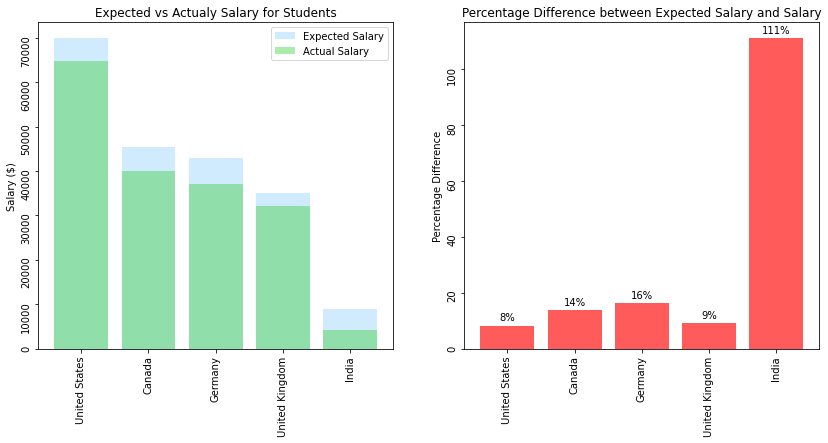

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.bar(df3_students_expected.index, df3_students_expected.values, color = "lightskyblue", label="Expected Salary", alpha = 0.4)
ax1.bar(df3_dev_salary.index, df3_dev_salary.values, color="limegreen", label="Actual Salary", alpha = 0.4)
ax1.set(ylabel='Salary ($)')
ax1.tick_params(labelrotation=90)
ax1.set_title("Expected vs Actualy Salary for Students");
ax1.legend();

ax2.bar(df3_comparison.index, df3_comparison.difference, color="red", alpha = 0.4)
ax2.tick_params(labelrotation=90)
ax2.set(ylabel='Percentage Difference')

pps = ax2.bar(df3_comparison.index, df3_comparison.difference, color="red", alpha = 0.4)
for p in pps:
    height = p.get_height()
    ax2.annotate('{:.0f}%'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
ax2.set_title("Percentage Difference between Expected Salary and Salary");

**Results** <br>

The results show that all students in the top 5 most occuring countires in the dataset have unrealistic salary expectations. The UK and USA students tend to have the most realistic expectations, and india with the worst.

The possible reaons for india having such a large difference in salary expectation could be because some of the students might be studying in a EU or USA university and therefore have a good chance of getting a job in a higher paid country. This is speculation and not backed by the data.

To improve the results the survey could include a question about the country the student is studying in. The data could have also included mature students who might have more relavant business experience and therefore a higher salary. The same could be said for those that have a PhD.